# The Linear Equation

$$y=mx$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
# สร้าง Algorithm y
def y(x, m):
  return m * x

In [4]:
# กำหนด ความชัน หรือเงื่อนไข m
m = 2
# กำหนด ข้อมูล Input x
x = np.arange(-10, 10)

print("ความชัน m = ", m)
print("ข้อมูล input x:", x)

ความชัน m =  2
ข้อมูล input x: [-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9]


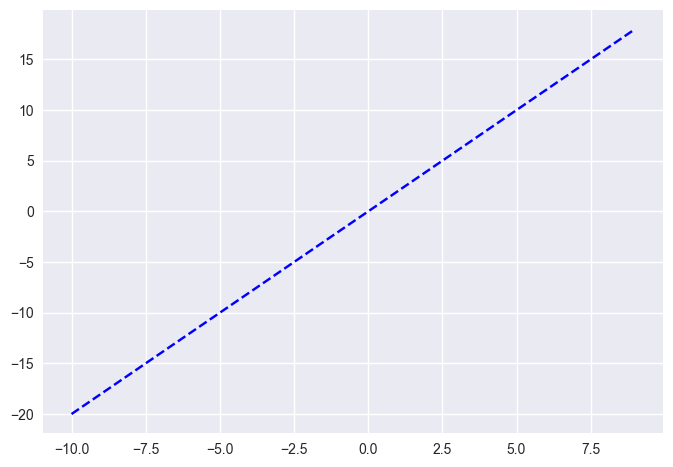

In [5]:
plt.plot(x, y(x, m), color='blue', linestyle='dashed')

## แบบฝึก 1
จงสร้าง algorithm สำรหรับ ฟังก์ชั่นเส้นตรง
$$y = mx + b$$

$b$ ถูกเรียกว่า Intercept ของสมการ $y$

In [18]:
# สร้าง Algorithm สำหรับฟังก์ชันเส้นตรง
def y(x, m, b):
    return m * x + b

In [19]:

# ทดสอบฟังก์ชัน
m = 2  # ความชัน
b = 3  # จุดตัดแกน y
x = np.arange(-10, 10)

Text(0.5, 1.0, 'Linear Function')

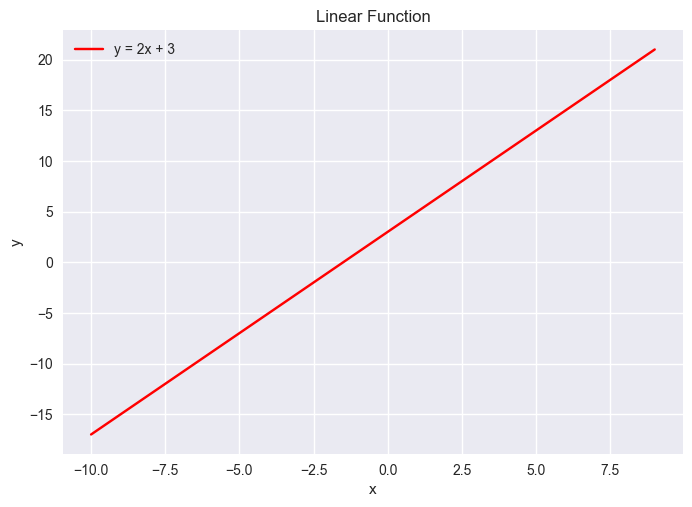

In [20]:
# พล็อตกราฟ
plt.figure(figsize=(8, 5.5))
plt.plot(x, y(x, m, b), color='red', linestyle='solid', label=f'y = {m}x + {b}')
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Function')

# The General Format of Linear Equation

$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 +\cdots + \beta_nx_n$$

- $y$ คือ **dependent variable**
- $x_1, x_2, \ldots, x_n$ คือ **independent variables** ซึ่งเป็นตัวกำหนดผล $y$.
- $\beta_0$ คือ intercept, แสดงถึงค่า $y$ เมื่อ $x$ ทั้งหมดเป็น 0.
- $\beta_1, \beta_2,\ldots, \beta_n$ คือ coefficients ซึ่งกำหนดผลกระทบของแต่ละ  $x$ ที่มีต่อ $y$.

In [21]:
from sklearn.datasets import make_regression

In [22]:
# สร้างข้อมูลเพื่อใช้ทดสอบโมเดลเชิงเส้น
x, y = make_regression(n_samples=100, n_features=10, noise=10, random_state=42)

In [23]:
x.shape, y.shape

((100, 10), (100,))

# Machine Learning: Linear Regression

หน้าที่ของ ML คือ การหา $\beta_0, \beta_1, \beta_2,\ldots, \beta_n$ จากข้อมูล $x, y$


จากข้อมูลข้างบนเรามี
- จำนวนข้อมูลอยู่ที่ `100` ตัวอย่าง
- จำนวน Independent variables อยู่ `10`  
หรือเขียนออกมาเป็น เวคเตอร์ $y$ และ เมทริกซ์ $x$ ได้ดังนี้

$$\text{Feature Data} = x =\begin{bmatrix}x_{1,1}&x_{1,2}&\cdots&x_{1,10}\\\\
                                          x_{2,1}&x_{2,2}&\cdots&x_{2,10}\\\\
                                          \vdots&\vdots&\ddots&\vdots\\\\
                                          x_{100,1}&x_{100, 2}&\cdots&x_{100, 10}
                            \end{bmatrix}$$

$$\text{label} = y = \begin{bmatrix}y_1\\y_2\\\vdots\\y_{100}\end{bmatrix}$$

นั่นหมายความว่าเราสามารถเขียนสมการเชิงเส้นโดยใช้การคูณเมทริกซ์ได้เป็น

$$
\begin{bmatrix}
1&x_{1,1}&x_{1,2}&\cdots&x_{1,10}\\
1&x_{2,1}&x_{2,2}&\cdots&x_{2,10}\\
\vdots&\vdots&\vdots&\ddots&\vdots\\
1&x_{100,1}&x_{100,2}&\cdots&x_{100,10}
\end{bmatrix}
\begin{bmatrix}
\beta_0\\
\beta_1\\
\beta_2\\
\vdots\\
\beta_{10}
\end{bmatrix}=
\begin{bmatrix}y_1\\y_2\\\vdots\\y_{100}\end{bmatrix}\to x\beta = y$$

In [24]:
# เพิ่ม intercepts ให้เมทริกซ์ x
x = np.hstack([np.ones((100, 1)), x])

In [25]:
x

array([[ 1.        , -0.92693047, -1.43014138, ..., -0.05952536,
        -0.25256815, -0.44004449],
       [ 1.        ,  0.20292302,  0.33445679, ..., -1.51574411,
        -0.61278869,  0.65854427],
       [ 1.        , -0.24123606,  0.45675322, ...,  0.3520554 ,
        -0.08215118,  0.56976728],
       ...,
       [ 1.        ,  0.49671415,  0.76743473, ..., -0.1382643 ,
        -0.23415337, -0.46947439],
       [ 1.        , -0.04946371,  2.45530014, ...,  0.67481949,
         0.16645221, -0.63773998],
       [ 1.        ,  0.36139561, -0.29900735, ...,  1.53803657,
        -2.6197451 ,  0.09176078]])

In [26]:
# ทดลองสุ่มสร้าง coefficients beta

np.random.seed(42)  # ตั้งค่า seed เพื่อให้ผลลัพธ์คงที่
beta = np.random.randn(11)  # สุ่มค่า 11 ตัว (10 features + 1 intercept)

print("Coefficients (beta):")
print(f"Beta_0 (intercept): {beta[0]:.4f}")
for i in range(1, len(beta)):
    print(f"Beta_{i}: {beta[i]:.4f}")

Coefficients (beta):
Beta_0 (intercept): 0.4967
Beta_1: -0.1383
Beta_2: 0.6477
Beta_3: 1.5230
Beta_4: -0.2342
Beta_5: -0.2341
Beta_6: 1.5792
Beta_7: 0.7674
Beta_8: -0.4695
Beta_9: 0.5426
Beta_10: -0.4634


ตัวอย่างผลการทำนาย 5 ค่าแรก:
y_pred[:5] = [ 1.81335178  5.30180532  3.52904067 -3.64911605 -3.23350756]

ตัวอย่างค่าจริง 5 ค่าแรก:
y[:5] = [-497.16989119  423.32183177  203.26741332 -192.385151   -190.25149498]

Mean Squared Error: 35957.5437


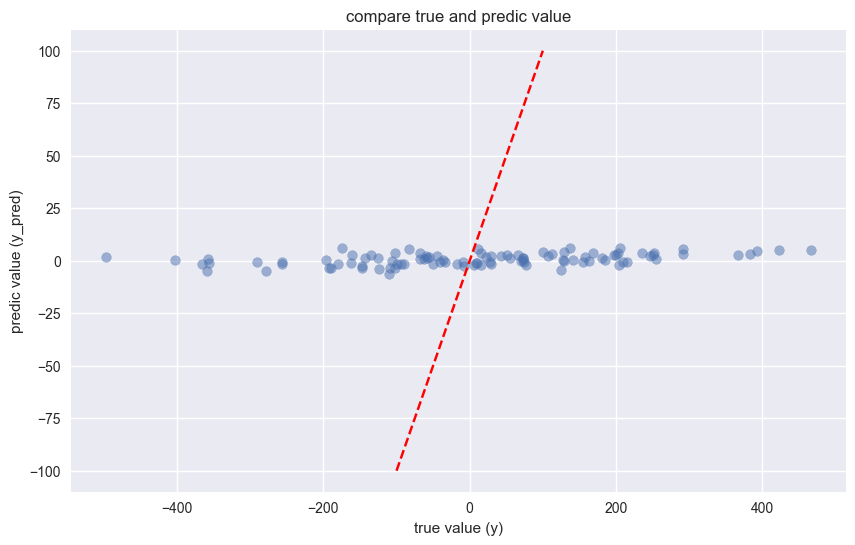

In [28]:
# ทดลองทำนาย y จาก coefficients beta ที่ได้จากการสุ่ม

y_pred = x @ beta  # การคูณเมทริกซ์ x กับ beta

# แสดงผลการทำนาย
print("ตัวอย่างผลการทำนาย 5 ค่าแรก:")
print("y_pred[:5] =", y_pred[:5])
print("\nตัวอย่างค่าจริง 5 ค่าแรก:")
print("y[:5] =", y[:5])

# คำนวณค่าความคลาดเคลื่อน
mse = np.mean((y - y_pred)**2)  # Mean Squared Error
print(f"\nMean Squared Error: {mse:.4f}")

# พล็อตกราฟเปรียบเทียบค่าจริงกับค่าทำนาย
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([-100, 100], [-100, 100], 'r--')  # เส้นทแยงมุม 45 องศา
plt.xlabel('true value (y)')
plt.ylabel('predic value (y_pred)')
plt.title('compare true and predic value')
plt.grid(True)

## การทดสอบผลลัพธ์ของ Linear Regression

$$R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$$

# การหา Optimal $\beta$

คูณทั้งสองข้างของสมการ $x\beta = y$ ด้วย $(x^\top x)^{-1}x^\top$

จะได้ว่า

$$
\begin{align}
x\beta &= y\\\\
(x^\top x)^{-1}x^\top x\beta &= (x^\top x)^{-1}x^\top y\\\\
(x^\top x)^{-1}(x^\top x)\beta &= (x^\top x)^{-1}x^\top y\\\\
I\beta &= (x^\top x)^{-1}x^\top y\\\\
\beta &= (x^\top x)^{-1}x^\top y
\end{align}
$$